### Imports

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import seaborn as sns
import matplotlib.cm as cm
import os
import pandas as pd

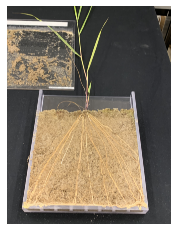

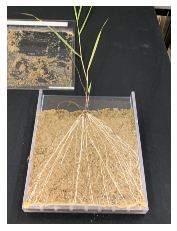

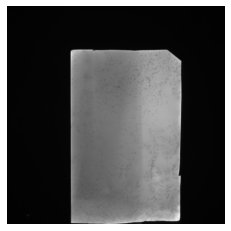

In [2]:
# Filenames to use
experiment = 3
stain = f'data/Membrane Images/Chitinase {experiment}.tif'
phosph_path = f'data/Membrane Images/Phosphatase {experiment}.bmp'
root_img_path = f'data/Root Images/Experiment {experiment}/processed/'
og = glob.glob(os.path.join(root_img_path, f'IMG_????.jpg'))[0]
soil_stain = glob.glob(os.path.join(root_img_path, f'*_soilstain.jpg'))[0]
output_path = f'output/Experiment {experiment}/'

# Create output path if needed
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Read in images (default is to read in as a BGR image)
stain_img = cv2.imread(stain)
og_root_img = cv2.imread(og)
soilstain_img = cv2.imread(soil_stain)

if experiment > 4:  # No chitin nutrient in Exp 1-4
    temp = glob.glob(os.path.join(root_img_path, '*chitin*.jpg'))[0]
    chitin_img = cv2.imread(temp)

if experiment < 5 or experiment > 16:  # No phosph measurement in Exp 5-16
    phosph_img = cv2.imread(phosph_path)

if experiment < 5 or experiment > 8:  # No roots in Exp 5-8
    temp = glob.glob(os.path.join(root_img_path, '*_traces.jpg'))[0]
    mask_img = cv2.imread(temp)

# QC: View root image as RGB image
plt.imshow(cv2.cvtColor(og_root_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

if experiment < 5 or experiment > 8:

    # View mask image as RGB image
    plt.imshow(cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

plt.imshow(cv2.cvtColor(stain_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

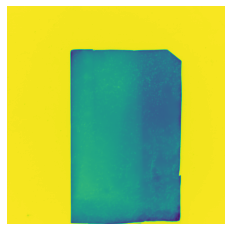

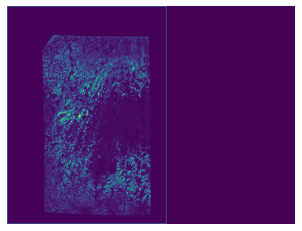

In [3]:
# Convert images to grayscale
# Done after initial data import above so any image can be viewed as RGB first
stain_img = cv2.cvtColor(stain_img, cv2.COLOR_BGR2GRAY)
og_root_img = cv2.cvtColor(og_root_img, cv2.COLOR_BGR2GRAY)
soilstain_img = cv2.cvtColor(soilstain_img, cv2.COLOR_BGR2GRAY)

if experiment > 4:  # No chitin nutrient in Exp 1-4
    chitin_img = cv2.cvtColor(chitin_img, cv2.COLOR_BGR2GRAY)

if experiment < 5 or experiment > 16:  # No phosph measurement in Exp 5-16
    phosph_img = np.array(cv2.cvtColor(phosph_img, cv2.COLOR_BGR2GRAY))

if experiment < 5 or experiment > 8:  # No roots in Exp 5-8
    mask_img = np.array(cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY))

# Invert signal for stain
# This will make higher signal -> higher value (max = 1)
stain_img = np.invert(stain_img)

# Show stain image
plt.imshow(stain_img)
plt.axis('off')
plt.show()

if experiment < 5 or experiment > 16:
    phosph_img = np.invert(phosph_img)

    # Show stain image
    plt.imshow(phosph_img)
    plt.axis('off')
    plt.show()

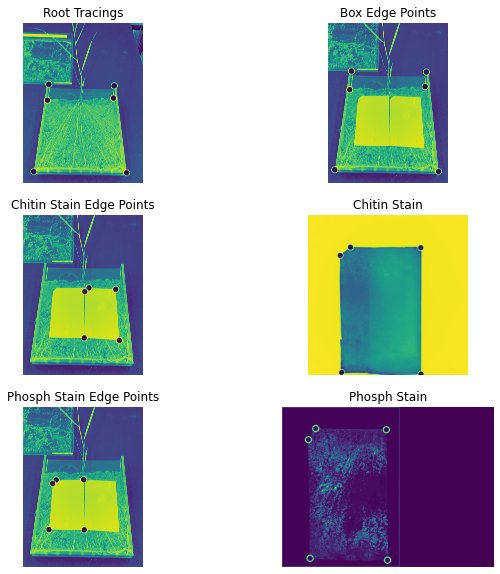

In [4]:
# Define bounds of stain
pts_mask_all = {
                1: [[492, 1352], [442, 1952], [126, 3702], [2151, 1406], [2184, 1868], [2472, 3702]],
                2: [[610, 1371], [572, 1880], [258, 3771], [2404, 1396], [2369, 1798], [2639, 3778]],
                3: [[650, 1545], [614, 1947], [272, 3744], [2298, 1582], [2279, 1893], [2610, 3773]],
                4: [[568, 1308], [514, 1829], [182, 3752], [2459, 1317], [2501, 1886], [2723, 3729]],
                5: [[387, 783], [407, 1253], [36, 3683], [2604, 754], [2622, 1163], [2938, 3627]],
                6: [[431, 702], [412, 1334], [174, 3356], [2475, 738], [2459, 1243], [2615, 3374]],
                7: [[523, 1015], [536, 1344], [267, 3581], [2502, 991], [2515, 1350], [2791, 3561]],
                8: [[559, 1284], [540, 1800], [267, 3723], [2429, 1304], [2441, 1689], [2649, 3823]],
                13: [[597, 1325], [560, 1751], [299, 3818], [2379, 1319], [2347, 1846], [2585, 3829]],
                14: [[686, 1250], [678, 1645], [377, 3747], [2467, 1238], [2470, 1684], [2710, 3782]],
                15: [[545, 895], [504, 1598], [225, 3709], [2588, 888], [2608, 1551], [2892, 3725]],
                16: [[758, 1308], [730, 1753], [410, 3731], [2450, 1298], [2485, 1804], [2716, 3798]],
                21: [[430, 533], [387, 1213], [175, 3512], [2600, 518], [2659, 1092], [3018, 3488]],
                22: [[780, 1406], [782, 1883], [660, 3458], [2222, 1358], [2263, 1740], [2557, 3430]],
                23: [[376, 927], [384, 1452], [162, 3783], [2398, 874], [2379, 1390], [2768, 3792]],
                24: [[571, 900], [549, 1319], [357, 3575], [2416, 847], [2445, 1252], [2825, 3450]]
                }
#soil box with membrane 
pts_soil_stain_all = {
                1: [[722, 1408], [676, 1994], [364, 3712], [2394, 1372], [2431, 1845], [2737, 3721]],
                2: [[598, 1153], [570, 1683], [257, 3665], [2502, 1140], [2475, 1563], [2811, 3637]],
                3: [[591, 1213], [547, 1680], [172, 3698], [2478, 1235], [2447, 1602], [2786, 3743]],
                4: [[583, 997], [515, 1593], [125, 3761], [2742, 976], [2779, 1641], [2987, 3777]],
                5: [[632, 909], [638, 1324], [240, 3526], [2580, 960], [2591, 1321], [2854, 3554]],
                6: [[700, 1268], [690, 1798], [501, 3640], [2458, 1234], [2479, 1656], [2771, 3588]],
                7: [[558, 918], [565, 1250], [250, 3499], [2561, 941], [2570, 1302], [2815, 3532]],
                8: [[797, 1180], [785, 1572], [575, 3036], [2208, 1203], [2216, 1496], [2382, 3116]],
                13: [[617, 1287], [590, 1713], [377, 3796], [2402, 1258], [2383, 1780], [2685, 3748]],
                14: [[517, 1013], [514, 1458], [215, 3774], [2492, 995], [2495, 1494], [2750, 3788]],
                15: [[582, 901], [543, 1613], [269, 3726], [2613, 910], [2631, 1576], [2899, 3753]],
                16: [[490, 994], [478, 1507], [213, 3703], [2406, 953], [2456, 1521], [2760, 3678]],
                21: [[624, 1126], [571, 1696], [317, 3646], [2454, 1144], [2489, 1632], [2748, 3694]],
                22: [[438, 1114], [428, 1711], [237, 3620], [2292, 1118], [2330, 1587], [2635, 3615]],
                23: [[726, 1434], [727, 1837], [532, 3636], [2287, 1437], [2271, 1831], [2541, 3682]],
                24: [[531, 1169], [514, 1568], [342, 3556], [2242, 1201], [2243, 1582], [2466, 3503]]
                }
#pixel coord, soilstain to membrane
#membrane on soil
pts_soil_membrane_all = {
                1: [[1597, 2112], [1520, 2216], [1610, 3262], [2225, 2063], [2459, 3220]],
                2: [[1675, 1863], [1580, 1940], [1577, 3124], [2369, 1897], [2485, 3170]],
                3: [[1662, 1836], [1559, 1931], [1543, 3096], [2335, 1872], [2427, 3158]],
                4: [[1793, 1883], [1655, 2002], [1647, 3398], [2571, 1921], [2708, 3426]],
                5: [[902, 1537], [770, 1633], [720, 2817], [2404, 1582], [2558, 2847]],
                6: [[926, 1972], [834, 2027], [782, 3187], [2290, 1971], [2464, 3165]],
                7: [[885, 1567], [748, 1639], [677, 2866], [2388, 1586], [2564, 2886]],
                8: [[995, 1760], [902, 1797], [837, 2717], [2111, 1774], [2217, 2745]],
                13: [[854, 1964], [753, 2023], [711, 3182], [2221, 1962], [2346, 3177]],
                14: [[848, 1737], [710, 1809], [611, 3087], [2293, 1719], [2380, 3074]],
                15: [[905, 1774], [784, 1847], [720, 3197], [2415, 1790], [2574, 3208]],
                16: [[790, 1702], [638, 1786], [542, 3024], [2226, 1683], [2328, 2993]],
                21: [[1655, 1852], [1563, 1927], [1600, 3111], [2354, 1884], [2451, 3133]],
                22: [[1490, 1822], [1390, 1901], [1432, 3042], [2153, 1815], [2293, 3018]],
                23: [[1607, 1934], [1516, 1993], [1501, 2988], [2140, 1954], [2224, 2984]],
                24: [[1575, 1750], [1450, 1838], [613, 2976], [2156, 1775], [2229, 2894]]
                }
#membrane
pts_stain_all = {
                1:[[1413, 437], [1573, 552], [1622, 2042], [617, 435], [569, 2032]],
                2: [[1413, 359], [1590, 506], [1553, 1963], [551, 356], [587, 1972]],
                3: [[1505, 411], [1636, 517], [1618, 2014], [604, 418], [602, 2037]],
                4: [[440, 88], [498, 133], [498, 624], [178, 85], [156, 624]],
                5: [[647, 87], [680, 140], [674, 643], [5, 87], [0, 638]],
                6: [[1867, 373], [2046, 492], [2044, 2019], [33, 414], [17, 2045]],
                7: [[622, 71], [675, 105], [679, 630], [11, 103], [9, 660]],
                8: [[648, 110], [680, 135], [681, 656], [11, 122], [1, 666]],
                13: [[1879, 358], [2021, 493], [2000, 1976], [8, 350], [2, 2003]],
                14: [[1880, 382], [2045, 496], [2029, 2014], [14, 378], [1, 2012]],
                15: [[1954, 282], [2046, 368], [2046, 1950], [32, 316], [2, 1955]],
                16: [[1892, 289], [2047, 401], [2044, 1931], [9, 296], [28, 1960]],
                21: [[461, 26], [523, 69], [501, 632], [119, 29], [130, 637]],
                22: [[472, 68], [530, 103], [533, 672], [135, 83], [146, 680]],
                23: [[1391, 405], [1562, 527], [1509, 1989], [553, 402], [498, 1991]],
                24: [[469, 34], [533, 90], [538, 633], [155, 41], [161, 641]]
                }

#phosph membrane
pts_phosph_soil_all = {
                1: [[867, 2155], [769, 2287], [766, 3345], [1493, 2107], [1600, 3283]],
                2: [[909, 1862], [783, 1971], [667, 3103], [1572, 1869], [1576, 3134]],
                3: [[836, 1837], [751, 1929], [655, 3088], [1530, 1831], [1542, 3094]],
                4: [[815, 1884], [715, 1956], [608, 3413], [1602, 1872], [1644, 3387]],
                21: [[872, 1840], [786, 1898], [649, 3061], [1547, 1855], [1541, 3113]],
                22: [[693, 1861], [566, 1967], [539, 3091], [1339, 1824], [1405, 3053]],
                23: [[915, 1943], [833, 1992], [715, 3020], [1471, 1945], [1447, 3006]],
                24: [[787, 1802], [710, 1853], [614, 2976], [1394, 1789], [1411, 2928]] 
                }

pts_phosph_stain_all = {
                1: [[185, 88], [131, 161], [137, 724], [524, 93], [527, 736]],
                2: [[208, 130], [150, 195], [146, 763], [542, 143], [540, 779]],
                3: [[165, 105], [129, 160], [137, 742], [511, 111], [517, 751]],
                4: [[228, 88], [190, 127], [194, 744], [561, 96], [571, 744]],
                21: [[177, 132], [140, 166], [142, 753], [522, 141], [536, 769]],
                22: [[195, 105], [137, 160], [139, 725], [523, 115], [515, 739]],
                23: [[153, 71], [102, 100], [88, 707], [490, 76], [478, 702]],
                24: [[186, 99], [147, 131], [137, 735], [517, 100], [517, 724]]
                }

pts_mask = pts_mask_all[experiment][:]
pts_soilstain = pts_soil_stain_all[experiment][:]
pts_soilmembrane = pts_soil_membrane_all[experiment][:]
pts_stain = pts_stain_all[experiment][:]

# Flip stain horizontally to match root image orientation
stain_img = cv2.flip(stain_img, 1)
pts_stain = [[stain_img.shape[1] - x, y] for x, y in pts_stain]

## Create figure comparing the point locations ##

def plot_xform_pts(img, pts, h, w, subplot_num, title):
    plt.subplot(h, w, subplot_num)
    temp = img.copy()
    for pt in pts:
        r = int(img.shape[0] / 50)
        t = int(r / 5)
        temp = cv2.circle(temp, pt, r, (255, 255, 255), t)
        temp = cv2.circle(temp, pt, r - t, (0, 0, 0), -1)
    plt.imshow(temp)
    plt.title(title)
    plt.axis('off')

fig, ax = plt.subplots(figsize = (10,10))
plot_xform_pts(og_root_img, pts_mask, 3, 2, 1, 'Root Tracings')
plot_xform_pts(soilstain_img, pts_soilstain, 3, 2, 2, 'Box Edge Points')
plot_xform_pts(soilstain_img, pts_soilmembrane, 3, 2, 3, 'Chitin Stain Edge Points')
plot_xform_pts(stain_img, pts_stain, 3, 2, 4, 'Chitin Stain')

if experiment < 5 or experiment > 20:
    pts_phosphsoil = pts_phosph_soil_all[experiment][:]
    pts_phosphstain = pts_phosph_stain_all[experiment][:]
    plot_xform_pts(soilstain_img, pts_phosphsoil, 3, 2, 5, 'Phosph Stain Edge Points')
    plot_xform_pts(phosph_img, pts_phosphstain, 3, 2, 6, 'Phosph Stain')

plt.savefig(output_path + 'pts_prexform.png', dpi=400)
plt.show()

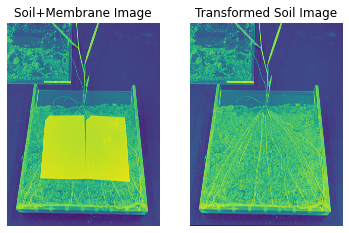

In [5]:
# Transform the soil image to fit the soil + membrane image

# Calculate transform
pts_mask = np.float32(pts_mask)
pts_soilstain = np.float32(pts_soilstain)
rows, cols = soilstain_img.shape
h, status = cv2.findHomography(pts_mask, pts_soilstain)

# Apply transform to soil image and derivatives
og_img_xform = cv2.warpPerspective(og_root_img, h, (cols, rows))
if experiment < 5 or experiment > 8:
    mask_img_xform = cv2.warpPerspective(mask_img, h, (cols, rows))
if experiment > 4:
    chitin_img_xform = cv2.warpPerspective(chitin_img, h, (cols, rows))

# Soil + membrane image
plt.subplot(1, 2, 1)
plt.imshow(soilstain_img)
plt.title('Soil+Membrane Image')
plt.axis('off')

# Show transformed soil image
plt.subplot(1, 2, 2)
plt.imshow(og_img_xform)
plt.title('Transformed Soil Image')
plt.axis('off')

plt.savefig(output_path + 'xform.png', dpi=500, bbox_inches='tight')
plt.show()

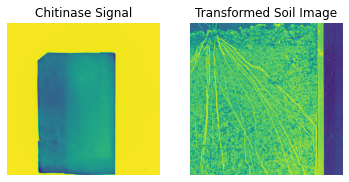

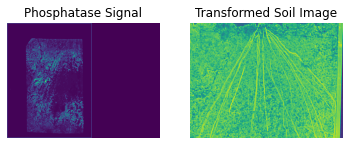

In [6]:
# Transform the soil image & soil + membrane images to fit the stain images

## Chitinase ##

# Calculate transform for chitinase stain
pts_stain = np.float32(pts_stain)
pts_soilmembrane = np.float32(pts_soilmembrane)
rows, cols = stain_img.shape
h, status = cv2.findHomography(pts_soilmembrane, pts_stain)

# Apply transform to soil image and derivatives
og_img_xform_chit = cv2.warpPerspective(og_img_xform, h, (cols, rows))
if experiment < 5 or experiment > 8:
    mask_img_xform_chit = cv2.warpPerspective(mask_img_xform, h, (cols, rows))
if experiment > 4:
    chitin_img_xform_chit = cv2.warpPerspective(chitin_img_xform, h, (cols, rows))

# Soil + membrane image
plt.subplot(1, 2, 1)
plt.imshow(stain_img)
plt.title('Chitinase Signal')
plt.axis('off')

# Show transformed soil image
plt.subplot(1, 2, 2)
plt.imshow(og_img_xform_chit)
plt.title('Transformed Soil Image')
plt.axis('off')

plt.savefig(output_path + 'xform_chitinase.png', dpi=500, bbox_inches='tight')
plt.show()

## Phosphatase ##

# Calculate transform for phosphatase stain
if experiment < 5 or experiment > 20:
    pts_phosphstain = np.float32(pts_phosphstain)
    pts_phosphsoil = np.float32(pts_phosphsoil)
    rows, cols = phosph_img.shape
    h, status = cv2.findHomography(pts_phosphsoil, pts_phosphstain)

    # Apply transform to soil image and derivatives
    og_img_xform_phosph = cv2.warpPerspective(og_img_xform, h, (cols, rows))
    if experiment < 5 or experiment > 8:
        mask_img_xform_phosph = cv2.warpPerspective(mask_img_xform, h, (cols, rows))
    if experiment > 4:
        chitin_img_xform_phosph = cv2.warpPerspective(chitin_img_xform, h, (cols, rows))

    # Soil + membrane image
    plt.subplot(1, 2, 1)
    plt.imshow(phosph_img)
    plt.title('Phosphatase Signal')
    plt.axis('off')

    # Show transformed soil image
    plt.subplot(1, 2, 2)
    plt.imshow(og_img_xform_phosph)
    plt.title('Transformed Soil Image')
    plt.axis('off')

    plt.savefig(output_path + 'xform_phosph.png', dpi=500, bbox_inches='tight')
    plt.show()


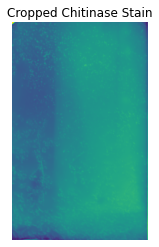

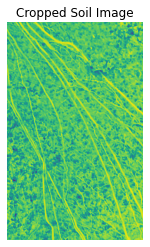

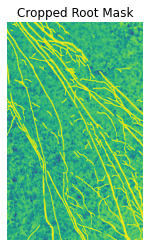

In [7]:
# Crop images based on chitinase transform

def crop_and_show(img, title, savename):
    img_crop = img[bounds[0]: bounds[1], bounds[2]: bounds[3]]
    plt.imshow(img_crop)
    plt.axis('off')
    plt.title(title)
    plt.savefig(output_path + savename, dpi=500, bbox_inches='tight')
    plt.show()

    return img_crop

bounds_all = {
                1: [535, 2050, 460, 1450],
                2: [500, 1965, 575, 1480],
                3: [450, 2020, 470, 1450],
                4: [133, 625, 175, 500],                
                5: [85, 640, 5, 640],
                6: [460, 2020, 30, 2020],
                7: [105, 630, 15, 653],
                8: [120, 630, 10, 660],
                13: [490, 1980, 30, 1980],
                14: [465, 1990, 10, 2030],
                15: [350, 1960, 35, 2045],
                16: [360, 1940, 25, 2020],
                21: [50, 640, 180, 550],
                22: [95, 675, 155, 535],
                23: [510, 2000, 540, 1500],
                24: [90, 635, 165, 510]
                }
bounds = bounds_all[experiment]

stain_img_crop = crop_and_show(stain_img, 'Cropped Chitinase Stain', 'Stain_Cropped_Chitinase.png')
og_img_xform_chit_crop = crop_and_show(og_img_xform_chit, 'Cropped Soil Image', 'Soil_Cropped_Chitinase.png')

if experiment > 4:
    chitin_img_xform_chit_crop = crop_and_show(chitin_img_xform_chit, 'Cropped Chitin Band', 'ChitinBand_Cropped_Chitinase.png')

if experiment < 5 or experiment > 8:
    mask_img_xform_chit_crop = crop_and_show(mask_img_xform_chit, 'Cropped Root Mask', 'RootMask_Cropped_Chitinase.png')


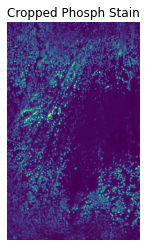

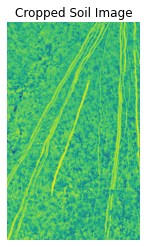

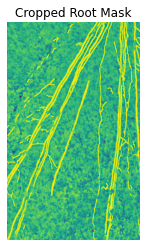

In [8]:
# Crop images based on phosphatase transform

bounds_all = {
                1: [20, 720, 16, 520],
                2: [155, 760, 180, 545],
                3: [140, 740, 145, 510],
                4: [110, 740, 205, 560],                
                21: [150, 750, 160, 525],
                22: [140, 725, 130, 520],
                23: [80, 700, 130, 480],
                24: [110, 720, 170, 515]
              }

if experiment in bounds_all.keys():
    bounds = bounds_all[experiment]

    phosph_img_crop = crop_and_show(phosph_img, 'Cropped Phosph Stain', 'Stain_Cropped_Phosphatase.png')
    og_img_xform_phosph_crop = crop_and_show(og_img_xform_phosph, 'Cropped Soil Image', 'Soil_Cropped_Phosphatase.png')

    if experiment > 4:
        chitin_img_xform_phosph_crop = crop_and_show(chitin_img_xform_phosph, 'Cropped Chitin Band', 'ChitinBand_Cropped_Phosphatase.png')

    if experiment < 5 or experiment > 8:
        mask_img_xform_phosph_crop = crop_and_show(mask_img_xform_phosph, 'Cropped Root Mask', 'RootMask_Cropped_Phosphatase.png')

In [9]:
# # Extract middle third of all
# _, w = stain_img_crop.shape; w = int(w / 3); stain_img_crop = stain_img_crop[:, w: w * 2]
# _, w = og_img_xform_chit_crop.shape; w = int(w / 3); og_img_xform_chit_crop = og_img_xform_chit_crop[:, w: w * 2]

# if experiment > 4:  # No chitin nutrient in Exp 1-4
#     _, w = chitin_img_xform_chit_crop.shape; w = int(w / 3); chitin_img_xform_chit_crop = chitin_img_xform_chit_crop[:, w: w * 2]

# if experiment < 5 or experiment > 16:  # No phosph measurement in Exp 5-16
#     _, w = phosph_img_crop.shape; w = int(w / 3); phosph_img_crop = phosph_img_crop[:, w: w * 2]
#     _, w = og_img_xform_phosph_crop.shape; w = int(w / 3); og_img_xform_phosph_crop = og_img_xform_phosph_crop[:, w: w * 2]
#     _, w = mask_img_xform_phosph_crop.shape; w = int(w / 3); mask_img_xform_phosph_crop = mask_img_xform_phosph_crop[:, w: w * 2]

#     if experiment > 4:
#         _, w = chitin_img_xform_phosph_crop.shape; w = int(w / 3); chitin_img_xform_phosph_crop = chitin_img_xform_phosph_crop[:, w: w * 2]

# if experiment < 5 or experiment > 8:  # No roots in Exp 5-8
#     _, w = mask_img_xform_chit_crop.shape; w = int(w / 3); mask_img_xform_chit_crop = mask_img_xform_chit_crop[:, w: w * 2]

In [10]:
# Create dataframe for all points

# Initialize dataframe
coords = np.where(stain_img_crop >= 0)
df = pd.DataFrame(coords).T
df = df.rename(columns={0:'i', 1:'j'})
df['(i, j)'] = df[['i','j']].apply(tuple, axis=1)
df['Root'] = False
df['Chitin Band'] = False
df['Level'] = 'A'

min_dist = 5
max_dist = 10
df['Close2Root'] = False
df['Close2Chitin'] = False
df['Close2Both'] = False

df['Dist2Root'] = np.nan
df['Dist2Chitin'] = np.nan
df['Dist2Both'] = np.nan

# Add stain image
df['Stain'] = stain_img_crop.flatten()

# Root related columns
if experiment < 5 or experiment > 8:
    root_mask = mask_img_xform_chit_crop > 252
    root_pixels = np.where(root_mask)
    root_pixels = list(zip(*root_pixels))
    df.loc[df['(i, j)'].isin(root_pixels), 'Root'] = True

    # Distance matrix: root
    temp = np.array(np.copy(root_mask), dtype=np.uint8)
    dist_root = cv2.distanceTransform(1 - temp, cv2.DIST_L2, 5)
    df['Dist2Root'] = dist_root.flatten()
    df['Close2Root'] = (df['Dist2Root'] > min_dist) & (df['Dist2Root'] <= max_dist)
else:
    # Add dummy Dist2Root col
    df['Dist2Root'] = np.nan
    root_cutoff = 256

# Chitinase related columns
if experiment > 4:

    # Mask: chitin band
    chitin_mask = chitin_img_xform_chit_crop > 252
    chitin_pixels = np.where(chitin_mask)
    chitin_pixels = list(zip(*chitin_pixels))
    df.loc[df['(i, j)'].isin(chitin_pixels), 'Chitin Band'] = True

    # Distance matrix: chitin
    temp = np.array(np.copy(chitin_mask), dtype=np.uint8)
    dist_chitin = cv2.distanceTransform(1 - temp, cv2.DIST_L2, 5)
    df['Dist2Chitin'] = dist_chitin.flatten()

    # Mask: pixels close to root and/or chitin
    df['Close2Chitin'] = (df['Dist2Chitin'] > min_dist) & (df['Dist2Chitin'] <= max_dist)

    # Create mask for pixels that are above the chitin band
    above_mask = np.zeros(chitin_mask.shape, dtype=bool)
    for j in range(chitin_mask.shape[1]):

        # Find middle pixel that is on the chitin band (starting from the top)
        i = np.where(chitin_mask[:, j])[0]
        i = i[int(len(i) / 2)]

        # Mark all pixels up to that point as above the chitin band
        above_mask[:i, j] = True
    above_mask[chitin_mask] = False  # Remove chitin band from this mask
    above_mask = above_mask.flatten()

    # Finalize both masks
    df.loc[~above_mask, 'Level'] = 'C'
    df.loc[df['Chitin Band'], 'Level'] = 'B'
    

# Update columns with chitin/root overlap
df['Dist2Both'] = df[['Dist2Root', 'Dist2Chitin']].apply(min, axis=1)
df['Close2Both'] = df['Close2Root'] & df['Close2Chitin']
df['Both'] = df['Root'] & df['Chitin Band']

# # Add location labels
# df['Classification'] = 'Soil'
# df.loc[df['Root'], 'Classification'] = 'Root'
# df.loc[df['Chitin Band'], 'Classification'] = 'Chitin Band'
# df.loc[df['Both'], 'Classification'] = 'Root & Chitin Band'

df.head()

,i,j,"(i, j)",Root,Chitin Band,Level,Close2Root,Close2Chitin,Close2Both,Dist2Root,Dist2Chitin,Dist2Both,Stain,Both
0,0,0,"(0, 0)",False,False,A,False,False,False,41.559692,NaN,41.559692,249,False
1,0,1,"(0, 1)",False,False,A,False,False,False,40.559692,NaN,40.559692,249,False
2,0,2,"(0, 2)",False,False,A,False,False,False,39.559692,NaN,39.559692,250,False
3,0,3,"(0, 3)",False,False,A,False,False,False,38.559692,NaN,38.559692,249,False
4,0,4,"(0, 4)",False,False,A,False,False,False,37.559692,NaN,37.559692,249,False


In [ ]:
#PHOSPHATASE dataframe

if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    # Create dataframe for all points

    # Initialize dataframe
    phcoords = np.where(phosph_img_crop > 0)
    dfp = pd.DataFrame(phcoords).T
    dfp = dfp.rename(columns={0:'i', 1:'j'})
    dfp['(i, j)'] = dfp[['i','j']].apply(tuple, axis=1)
    dfp['Root'] = False
    dfp['Chitin Band'] = False
    dfp['Close2Root'] = False
    dfp['Close2Chitin'] = False
    dfp['Close2Both'] = False

    dfp['Dist2Root'] = np.nan
    dfp['Dist2Chitin'] = np.nan
    dfp['Dist2Both'] = np.nan

    # Add ph stain image
    dfp['Stain'] = phosph_img_crop.flatten()

    # Mask: root
    # Threshold set to 99.9th percentile value of the untraced root image
    root_cutoffph = np.percentile(og_img_xform_phosph_crop, 99.99)
    root_maskph = mask_img_xform_phosph_crop > root_cutoffph
    root_pixelsph = np.where(root_maskph)
    root_pixelsph = list(zip(*root_pixelsph))
    dfp.loc[dfp['(i, j)'].isin(root_pixelsph), 'Root'] = True

    # Distance matrix: root
    temp = np.array(np.copy(root_maskph), dtype=np.uint8)
    dist_root = cv2.distanceTransform(1 - temp, cv2.DIST_L2, 5)
    dfp['Dist2Root'] = dist_root.flatten()

    # Add dummy Dist2Root col
    #df['Dist2Root'] = np.nan
    #root_cutoff = 256

    if experiment >= 5 and experiment <= 24:
        # Mask: chitin band
        chitin_cutoffph = np.percentile(chitin_img_xform_phosph_crop, 99.99)
        chitin_maskph = chitin_img_xform_phosph_crop > 254
        chitin_pixelsph = np.where(chitin_maskph)
        chitin_pixelsph = list(zip(*chitin_pixelsph))
        dfp.loc[dfp['(i, j)'].isin(chitin_pixelsph), 'Chitin Band'] = True

        # Distance matrix: chitin
        temp = np.array(np.copy(chitin_maskph), dtype=np.uint8)
        dist_chitinph = cv2.distanceTransform(1 - temp, cv2.DIST_L2, 5)
        dfp['Dist2Chitin'] = dist_chitinph.flatten()

    if experiment >= 5 and experiment <= 24:
        # Mask: both root and chitin band
        both_cutoff = max(root_cutoffph, chitin_cutoffph)

    # Distance matrix: both
    dfp['Dist2Both'] = dfp[['Dist2Root', 'Dist2Chitin']].apply(min, axis=1)

    # Mask: pixels close to root and/or chitin
    min_dist = 5
    max_dist = 10
    dfp['Close2Root'] = (dfp['Dist2Root'] > min_dist) & (dfp['Dist2Root'] <= max_dist)
    dfp['Close2Chitin'] = (dfp['Dist2Chitin'] > min_dist) & (dfp['Dist2Chitin'] <= max_dist)
    dfp['Close2Both'] = dfp['Close2Root'] & dfp['Close2Chitin']

    if experiment >= 5 and experiment <= 24:
        # Create mask for pixels that are above the chitin band
        above_maskph = np.zeros(chitin_maskph.shape, dtype=bool)
        for j in range(chitin_maskph.shape[1]):

            # Find middle pixel that is on the chitin band (starting from the top)
            i = np.where(chitin_maskph[:, j])[0]
            i = i[int(len(i) / 2)]

            # Mark all pixels up to that point as above the chitin band
            above_maskph[:i, j] = True
        above_maskph[chitin_maskph] = False  # Remove chitin band from this mask
        above_maskph = above_maskph.flatten()

    if experiment >= 5 and experiment <= 24:
        # Finalize both masks
        dfp['Level'] = 'C'
        dfp.loc[above_maskph, 'Level'] = 'A'
        dfp.loc[dfp['Chitin Band'], 'Level'] = 'B'


    if experiment >= 1 and experiment <= 4:
        dfp['Level'] = 'A'

    dfp['Both'] = dfp['Root'] & dfp['Chitin Band']

    # Add location labels
    #dfp['Classification'] = 'Soil'
    #dfp.loc[dfp['Root'], 'Classification'] = 'Root'
    #dfp.loc[dfp['Chitin Band'], 'Classification'] = 'Chitin Band'
    #dfp.loc[dfp['Both'], 'Classification'] = 'Root & Chitin Band'

if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    dfp.head()

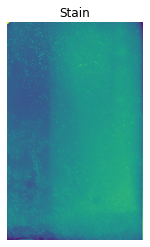

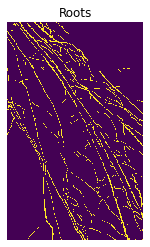

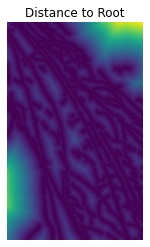

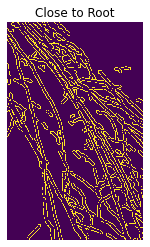

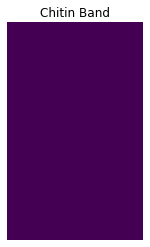

/opt/anaconda3/envs/chitinase/lib/python3.9/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/anaconda3/envs/chitinase/lib/python3.9/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


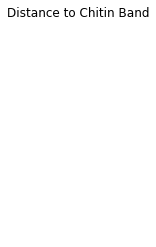

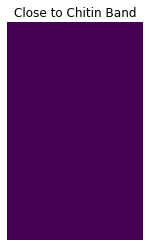

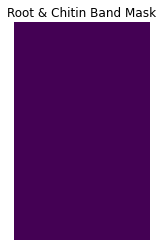

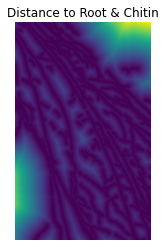

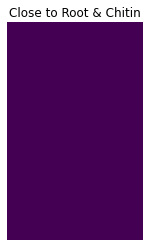

In [11]:
# Plot all the things, as they appear in the df
# Have to do this before removing or mixing any rows

def plot_col_as_image(col, shape, title=None, savename=None, **kwargs):
    img = col.values.reshape(shape[0], shape[1])
    plt.imshow(img, interpolation='none', **kwargs)
    plt.axis('off')
    plt.title(title)

    if savename is not None:
        plt.savefig(savename, dpi=400, bbox_inches='tight')

    plt.show()

shape = stain_img_crop.shape

plot_col_as_image(df['Stain'], shape, title='Stain',
                  savename=output_path + 'Stain')

plot_col_as_image(df['Root'], shape, title='Roots',
                  savename=output_path + 'RootMask')
plot_col_as_image(df['Dist2Root'], shape, title='Distance to Root',
                  savename=output_path + 'Dist2Root')
plot_col_as_image(df['Close2Root'], shape, title='Close to Root',
                  savename=output_path + 'Close2Root')

plot_col_as_image(df['Chitin Band'], shape, title='Chitin Band',
                  savename=output_path + 'ChitinBand')
plot_col_as_image(df['Dist2Chitin'], shape, title='Distance to Chitin Band',
                  savename=output_path + 'Dist2Chitin')
plot_col_as_image(df['Close2Chitin'], shape, title='Close to Chitin Band',
                  savename=output_path + 'Close2Chitin')

plot_col_as_image(df['Both'], shape, title='Root & Chitin Band Mask',
                  savename=output_path + 'Both')
plot_col_as_image(df['Dist2Both'], shape, title='Distance to Root & Chitin',
                  savename=output_path + 'Dist2Both')
plot_col_as_image(df['Close2Both'], shape, title='Close to Root & Chitin',
                  savename=output_path + 'Close2Both')


In [ ]:
#PHOSPHATASE

if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    phshape = phosph_img_crop.shape

    plot_col_as_image(dfp['Stain'], phshape, title='Phosph Stain',
                    savename=output_path + 'phStain')

    plot_col_as_image(dfp['Root'], phshape, title='(Phosph) Roots',
                    savename=output_path + 'phRootMask')
    plot_col_as_image(dfp['Dist2Root'], phshape, title='(Phosph) Distance to Root',
                    savename=output_path + 'phDist2Root')
    plot_col_as_image(dfp['Close2Root'], phshape, title='Phosph Close to Root',
                    savename=output_path + 'phClose2Root')

    if experiment >= 5 and experiment <= 24:
        plot_col_as_image(dfp['Chitin Band'], phshape, title='Phosph Chitin Band',
                        savename=output_path + 'phChitinBand')
        plot_col_as_image(dfp['Dist2Chitin'], phshape, title='Phosph Distance to Chitin Band',
                        savename=output_path + 'phDist2Chitin')
        plot_col_as_image(dfp['Close2Chitin'], phshape, title='Phosph Close to Chitin Band',
                        savename=output_path + 'phClose2Chitin')

        plot_col_as_image(dfp['Both'], phshape, title='Phosph Root & Chitin Band Mask',
                        savename=output_path + 'phBoth')
        plot_col_as_image(dfp['Dist2Both'], phshape, title='Phosph Distance to Root & Chitin',
                        savename=output_path + 'phDist2Both')
        plot_col_as_image(dfp['Close2Both'], phshape, title='Phosph Close to Root & Chitin',
                        savename=output_path + 'phClose2Both')

    dfp.head()

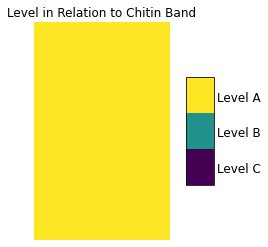

In [12]:
# Level labels
mask = df['Level'].values.reshape(shape[0], shape[1])
temp = np.zeros(shape)
temp[mask == 'A'] = 2
temp[mask == 'B'] = 1
temp[mask == 'C'] = 0

# palette = ['#e41a1c', '#377eb8', '#4daf4a']  # Select 3 discrete colors
cmap = cm.get_cmap('viridis', 3)  # Select 3 discrete colors

plt.imshow(temp, interpolation='none', cmap=cmap, vmin=0, vmax=2)
plt.axis('off')
plt.title('Level in Relation to Chitin Band')

cbar = plt.colorbar(ticks=np.arange(0.33, 2.1, 0.66), shrink=0.5, aspect=4)
cbar.ax.yaxis.set_ticklabels(['Level C', 'Level B', 'Level A'], fontsize=12)
cbar.ax.tick_params(size=0)

plt.savefig(output_path + 'LevelMask', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# Level labels
# Phosphatase edition

if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    mask = dfp['Level'].values.reshape(phshape[0], phshape[1])
    temp = np.zeros(phshape)
    temp[mask == 'A'] = 2
    temp[mask == 'B'] = 1
    temp[mask == 'C'] = 0

    palette = ['#e41a1c', '#377eb8', '#4daf4a']  # Select 3 discrete colors
    cmap = cm.get_cmap('viridis', 3)  # Select 3 discrete colors

    plt.imshow(temp, interpolation='none', cmap=cmap, vmin=0, vmax=2)
    plt.axis('off')
    plt.title('Phosph Level in Relation to Chitin Band')

    cbar = plt.colorbar(ticks=np.arange(0.33, 2.1, 0.66), shrink=0.5, aspect=4)
    cbar.ax.yaxis.set_ticklabels(['Level C', 'Level B', 'Level A'], fontsize=12)
    cbar.ax.tick_params(size=0)

    plt.savefig(output_path + 'phLevelMask', dpi=400, bbox_inches='tight')
    plt.show()

    dfp.head()

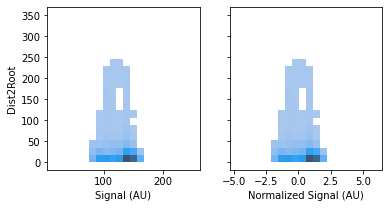

In [14]:
# Normalize stain values based on chitin band

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

# Plot raw stain values
sns.histplot(data=df, x='Stain', y='Dist2Root', bins=20, ax=ax1, pthresh=0.05)
ax1.set_xlabel('Signal (AU)')

# Normalize stain values based on average chitin band signal
df['RawStain'] = df['Stain']  # Copy raw values to a new column
if experiment in [5, 6, 7, 8]:  # No roots
    norm_values = df[df['Level'] == 'A']['Stain']
else:
    norm_values = df[(df['Dist2Root'] >= 25) & (df['Level'] == 'A')]['Stain']
df['Stain'] -= norm_values.mean()  # Set chitin band mean to 0
df['Stain'] /= norm_values.std()  # Set chitin band std dev to 1

# Plot normalized stain values
sns.histplot(data=df, x='Stain', y='Dist2Root', bins=20, ax=ax2, pthresh=0.05)
ax2.set_xlabel('Normalized Signal (AU)')
ax2.set_ylabel(None)

plt.savefig(output_path + 'StainValueNormalization', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# Normalize stain values based on chitin band
# Phosphatase edition

if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

    # Plot raw stain values
    sns.histplot(data=dfp, x='Stain', y='Dist2Root', bins=20, ax=ax1, pthresh=0.05)
    ax1.set_xlabel('Signal (AU)')

    # Normalize stain values based on average chitin band signal
    dfp['RawStain'] = dfp['Stain']  # Copy raw values to a new column
    if experiment in [5, 6, 7, 8]:  # No roots
        norm_values = df[df['Level'] == 'A']['Stain']
    else:
        norm_values = dfp[(dfp['Dist2Root'] >= 25) & (dfp['Level'] == 'A')]['Stain']
    dfp['Stain'] -= norm_values.mean()  # Set chitin band mean to 0
    dfp['Stain'] /= norm_values.std()  # Set chitin band std dev to 1

    # Plot normalized stain values
    sns.histplot(data=dfp, x='Stain', y='Dist2Root', bins=20, ax=ax2, pthresh=0.05)
    ax2.set_xlabel('Normalized Signal (AU)')
    ax2.set_ylabel(None)

    plt.savefig(output_path + 'PhosphStainValueNormalization', dpi=400, bbox_inches='tight')
    plt.show()

In [15]:
if experiment > 4:
    plot_col_as_image(df['Stain'], shape, title='Normalized Stain',
                    vmin=-7, vmax=7,
                    savename=output_path + 'Stain_Normalized')

In [ ]:
# Phosphatase
if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    plot_col_as_image(dfp['Stain'], phshape, title='Normalized Stain',
                    vmin=-7, vmax=7,
                    savename=output_path + 'Phosph_Stain_Normalized')

    dfp.head()

In [16]:
# Since these are normalized, remove points >7 std away from the norm
if experiment > 4:
    print(len(df))
    df = df[abs(df['Stain']) <= 7]
    print(len(df))

In [ ]:
# Phosphatase
# Since these are normalized, remove points >7 std away from the norm
if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    print(len(dfp))
    dfp = dfp[abs(dfp['Stain']) <= 7]
    print(len(dfp))

In [17]:
df.to_pickle(output_path + 'df.pkl')
if experiment >= 1 and experiment <= 4 or experiment >= 21 and experiment <= 24:
    dfp.to_pickle(output_path + 'dfp.pkl')

In [18]:
df.head()

,i,j,"(i, j)",Root,Chitin Band,Level,Close2Root,Close2Chitin,Close2Both,Dist2Root,Dist2Chitin,Dist2Both,Stain,Both,RawStain
0,0,0,"(0, 0)",False,False,A,False,False,False,41.559692,NaN,41.559692,5.895877,False,249
1,0,1,"(0, 1)",False,False,A,False,False,False,40.559692,NaN,40.559692,5.895877,False,249
2,0,2,"(0, 2)",False,False,A,False,False,False,39.559692,NaN,39.559692,5.941591,False,250
3,0,3,"(0, 3)",False,False,A,False,False,False,38.559692,NaN,38.559692,5.895877,False,249
4,0,4,"(0, 4)",False,False,A,False,False,False,37.559692,NaN,37.559692,5.895877,False,249
